In [1]:
## install sci-kit learn
!pip install scikit-learn

In [2]:
## load the K-nn algorithm for nearest neighbors 
from sklearn.neighbors import NearestNeighbors

In [5]:
## load a dataset 
from sklearn.datasets import load_iris
X, y  = load_iris(return_X_y=True)

In [11]:
## number of neighbors to use
k = 5

## instantiate the object 
knn = NearestNeighbors(n_neighbors=k)

## fit the object to the data
knn.fit(X)

# ## find the k nearest neighbors of the first example
print(knn.kneighbors(X[0:1]))

(array([[0.        , 0.1       , 0.14142136, 0.14142136, 0.14142136]]), array([[ 0, 17,  4, 39, 28]]))


In [ ]:
!pip install matplotlib

In [14]:
import matplotlib.pyplot as plt

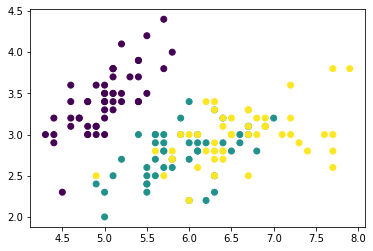

In [15]:
## plot the data

plt.scatter(X[:,0], X[:,1], c=y)

In [35]:
!pip install -qq pandas
## load the data 
import pandas as pd 
df = pd.read_csv("./data/data.csv")

In [60]:
df = pd.read_csv("./data/data.csv")
## skip the first row 
## make the 2nd row the column names 
first_row = df.iloc[0]
df.columns = first_row
df = df.iloc[1:]
## drop the Cost/Energy…? column
to_drop = df.columns[-1]
df.drop(to_drop, axis=1, inplace=True)
## set "Processes" to the index 
df = df.set_index("Processes")
## convert to float 
df = df.astype(int)

In [64]:
## there are processes P-001 to P-030 and there are materials M-001 to M-020
## for each process, create a list of tuples, such as: (P-001, M-001, value), (P-001, M-002, value), ...
## this will be a list of edges 
l = []
for process in df.index:
    for material in df.columns:
         l.append((process, material))#, df.loc[process, material]))


In [90]:
## make an edgelist dictionary 
l = []
for process in df.index:
    for material in df.columns:
        #d = dict(A=process, B=material, energy=df.loc[process, material])
        l.append((process, material))#, df.loc[process, material]))


In [56]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [74]:
import networkx as nx
## make a bipartite graph from the list of edges 
g = nx.Graph()
## add the edges
#g.add_edges_from(l)


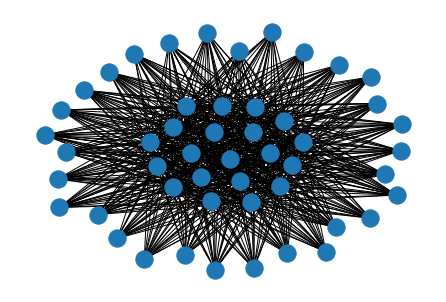

In [75]:
## show the graph 
nx.draw(g)

{1, 2, 3, 4}

In [91]:
processes = list(df.index)
materials = list(df.columns)

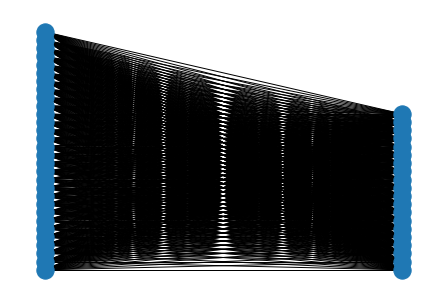

In [105]:
## making the bipartite graph 
from networkx.algorithms import bipartite

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(processes, bipartite=0) ## our nodes are the processes

B.add_nodes_from(materials, bipartite=1) ## our nodes are the materials

# Add edges only between nodes of opposite node sets
B.add_edges_from(l)



# Separate by group
left_set, right_set = bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(left_set))
pos.update((node, (2, index)) for index, node in enumerate(right_set))


## for each connection, add the corresponding value from the dataframe
for edge in B.edges():
    B[edge[0]][edge[1]]['weight'] = df.loc[edge[0], edge[1]]

nx.draw(B, pos=pos)
plt.show()

In [106]:
B.edges(data=True)

EdgeDataView([('P-001', 'M-001', {'weight': -73}), ('P-001', 'M-002', {'weight': 0}), ('P-001', 'M-003', {'weight': 59}), ('P-001', 'M-004', {'weight': 0}), ('P-001', 'M-005', {'weight': 48}), ('P-001', 'M-006', {'weight': 0}), ('P-001', 'M-007', {'weight': 0}), ('P-001', 'M-008', {'weight': 0}), ('P-001', 'M-009', {'weight': 0}), ('P-001', 'M-010', {'weight': 0}), ('P-001', 'M-011', {'weight': 0}), ('P-001', 'M-012', {'weight': -60}), ('P-001', 'M-013', {'weight': 0}), ('P-001', 'M-014', {'weight': 0}), ('P-001', 'M-015', {'weight': -26}), ('P-001', 'M-016', {'weight': 0}), ('P-001', 'M-017', {'weight': 0}), ('P-001', 'M-018', {'weight': -9}), ('P-001', 'M-019', {'weight': -15}), ('P-001', 'M-020', {'weight': 0}), ('P-002', 'M-001', {'weight': 0}), ('P-002', 'M-002', {'weight': 0}), ('P-002', 'M-003', {'weight': 0}), ('P-002', 'M-004', {'weight': 0}), ('P-002', 'M-005', {'weight': 73}), ('P-002', 'M-006', {'weight': 0}), ('P-002', 'M-007', {'weight': 0}), ('P-002', 'M-008', {'weight':